In [126]:
import geopandas as gpd

# Obtener un mapa

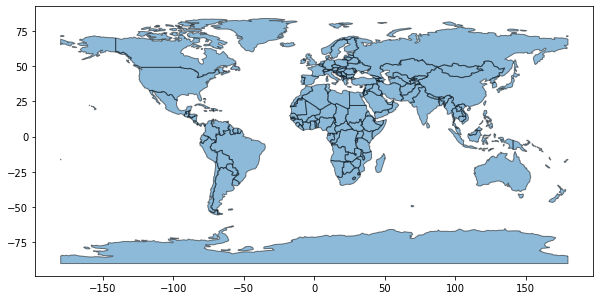

In [127]:
# Obtener un mapa
df = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Obtener puntos aleatorios
Obtenido e inspirado de [StackExchange](https://gis.stackexchange.com/questions/294394/randomly-sample-from-geopandas-dataframe-in-python)

In [128]:
from shapely.geometry import Point
import random

In [129]:
######
def random_points_in_polygon(number, polygon):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro de un polígono 'polygon'.
    """
    points = []
    ptos = min_x, min_y, max_x, max_y = polygon.bounds
    i = 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  # returns list of shapely point
######

In [135]:
######
def random_points_in_geodataframe_v1(number, gdf):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro 
    de un GeoDataFrame 'gdf'. Versión 1.
    """
    N = len(gdf)
    points = []
    i = 0
    while i < number:
        # País aleatorio
        j = random.randint(0, N)
        polygon = gdf.iloc[j].geometry
        point = random_points_in_polygon(1, polygon)
        points += point
        i += 1
        
    return points
######

In [136]:
######
def random_points_in_geodataframe_v2(number, gdf):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro 
    de un GeoDataFrame 'gdf'. Versión 2.
    """
    from shapely.ops import cascaded_union
    boundary = cascaded_union(gdf['geometry'])
    points = random_points_in_polygon(number, boundary)    
    return points
######

La segunda versión es mejor, pues el área del país pondera la probabilidad de que un punto aparezca en él.

In [141]:
# Generamos números aleatorios
points = random_points_in_geodataframe_v2(100, df)

In [142]:
# for i, point in enumerate(points):
#     print("Point {}: ({},{})".format(str(i+1), point.x, point.y))

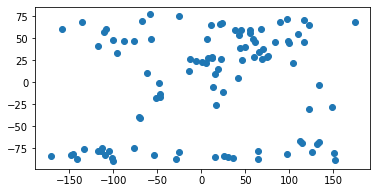

In [143]:
# Hacemos un GeoSeries a partir de los puntos
df_points = gpd.GeoSeries(points)
df_points.plot()

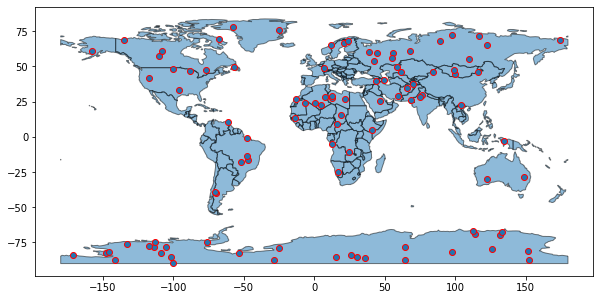

In [144]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df_points.plot(figsize=(10, 10), edgecolor='r', ax=ax)

# Crear nueva clase de no-landslide

In [145]:
from src.ReMasFrame import ReMasFrame

In [146]:
ReMasFrame()

/opt/conda/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


,location_description,landslide_size,event_date,landslide_category,landslide_trigger,fatality_count,injury_count,longitude,latitude,geometry
0,"Sigou Village, Loufan County, Shanxi Province",large,2008-08-01,landslide,rain,11.0,NaN,107.450000,32.562500,POINT (107.45000 32.56250)
1,"Lake Oswego, Oregon",small,2009-01-02,mudslide,downpour,0.0,NaN,-122.663000,45.420000,POINT (-122.66300 45.42000)
2,"San Ramon district, 195 miles northeast of the...",large,2007-01-19,landslide,downpour,10.0,NaN,-75.358700,-11.129500,POINT (-75.35870 -11.12950)
3,Dailekh district,medium,2009-07-31,landslide,monsoon,1.0,NaN,81.708000,28.837800,POINT (81.70800 28.83780)
5,"Paguite, Abuyog, Leyte",medium,2012-02-16,landslide,downpour,0.0,NaN,124.966800,10.700400,POINT (124.96680 10.70040)
...,...,...,...,...,...,...,...,...,...,...
11025,"Marine View Dr, Tacoma, Washington, 98422",small,2016-11-01,landslide,rain,0.0,0.0,-122.409942,47.290915,POINT (-122.40994 47.29092)
11026,"Tamisk, North Ossetia, Russia",small,2017-06-21,mudslide,rain,0.0,0.0,44.211414,42.954914,POINT (44.21141 42.95491)
11027,"509 S Sunset Terrace, Above Highway 97, Harris...",small,2017-03-23,mudslide,rain,0.0,0.0,-116.777680,47.449165,POINT (-116.77768 47.44917)
11028,"Banaran, Ponorogo, Jawa Timur, Indonesia",medium,2017-04-01,landslide,rain,27.0,0.0,111.679944,-7.853409,POINT (111.67994 -7.85341)
